In [164]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import seaborn as sns
%matplotlib inline
df = pd.read_csv('imdb_top_1000.csv')

In [165]:
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


Which film have the highest IMDB rating?

In [166]:
imdb_rating_max = df.loc[df['IMDB_Rating'].idxmax()]
imdb_rating_max

Poster_Link      https://m.media-amazon.com/images/M/MV5BMDFkYT...
Series_Title                              The Shawshank Redemption
Released_Year                                                 1994
Certificate                                                      A
Runtime                                                    142 min
Genre                                                        Drama
IMDB_Rating                                                    9.3
Overview         Two imprisoned men bond over a number of years...
Meta_score                                                    80.0
Director                                            Frank Darabont
Star1                                                  Tim Robbins
Star2                                               Morgan Freeman
Star3                                                   Bob Gunton
Star4                                               William Sadler
No_of_Votes                                                234

Which film have the lowest IMDB rating?

In [167]:
imdb_rating_min = df.loc[df['IMDB_Rating'].idxmin()]
imdb_rating_min

Poster_Link      https://m.media-amazon.com/images/M/MV5BODQ0M2...
Series_Title                                           Dark Waters
Released_Year                                                 2019
Certificate                                                  PG-13
Runtime                                                    126 min
Genre                                    Biography, Drama, History
IMDB_Rating                                                    7.6
Overview         A corporate defense attorney takes on an envir...
Meta_score                                                    73.0
Director                                               Todd Haynes
Star1                                                 Mark Ruffalo
Star2                                                Anne Hathaway
Star3                                                  Tim Robbins
Star4                                                 Bill Pullman
No_of_Votes                                                  6

What are the top 10 films by IMDB rating?
---

In [168]:
top_10_rating = df.sort_values(by='IMDB_Rating', ascending=False)[:10]
top_10_rating

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,"315,544,750"
11,https://m.media-amazon.com/images/M/MV5BNWIwOD...,Forrest Gump,1994,UA,142 min,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,"330,252,182"


How many films were released each year?
---

In [169]:
films_each_year = df.groupby(['Released_Year'])['Released_Year'].count()
films_each_year

Released_Year
1920     1
1921     1
1922     1
1924     1
1925     2
        ..
2017    22
2018    19
2019    23
2020     6
PG       1
Name: Released_Year, Length: 100, dtype: int64

What was the average IMDB rating for films released each year?
---

In [170]:
avg_rating_each_year = df.groupby(['Released_Year'])['IMDB_Rating'].mean().round(2)
avg_rating_each_year

Released_Year
1920    8.10
1921    8.30
1922    7.90
1924    8.20
1925    8.10
        ... 
2017    7.89
2018    7.99
2019    8.00
2020    8.13
PG      7.60
Name: IMDB_Rating, Length: 100, dtype: float64

How many films are there in each genre?
---

In [171]:
films_in_each_genre = df.groupby(['Genre'])['Genre'].count()
films_in_each_genre

Genre
Action, Adventure                5
Action, Adventure, Biography     1
Action, Adventure, Comedy       10
Action, Adventure, Crime         1
Action, Adventure, Drama        14
                                ..
Mystery, Romance, Thriller       1
Mystery, Sci-Fi, Thriller        2
Mystery, Thriller                9
Thriller                         1
Western                          4
Name: Genre, Length: 202, dtype: int64

What is the average IMDB rating for each genre?
---

In [172]:
imdb_rating_genre = df.groupby(['Genre'])['IMDB_Rating'].mean().round(2)[:10]
imdb_rating_genre

Genre
Action, Adventure               8.18
Action, Adventure, Biography    7.90
Action, Adventure, Comedy       7.91
Action, Adventure, Crime        7.60
Action, Adventure, Drama        8.15
Action, Adventure, Family       7.60
Action, Adventure, Fantasy      8.20
Action, Adventure, History      7.90
Action, Adventure, Horror       7.90
Action, Adventure, Mystery      7.60
Name: IMDB_Rating, dtype: float64

Which director has directed the most films?
---

In [173]:

director_counts = df.groupby('Director').size().reset_index(name='Film Count').max()
director_counts

Director      Ömer Faruk Sorak
Film Count                  14
dtype: object

Is ther correlation between runtime and IMDB rating?
---

<Axes: >

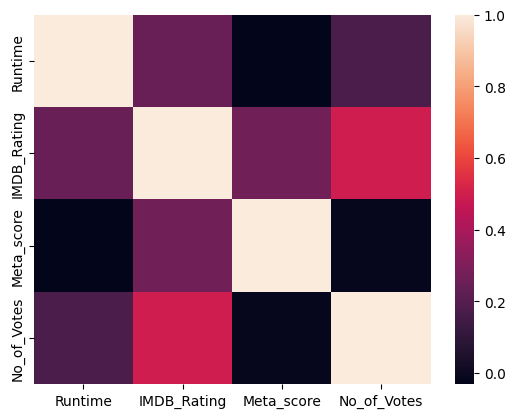

In [174]:
df['Runtime'] = df['Runtime'].str.replace("min", '').apply(pd.to_numeric)

corr = df.select_dtypes('number').corr()
sns.heatmap(corr)

There is low correlation (0.2) between runtime and IMDB rating



What is the average Meta score of the films?
----

In [175]:
avg_score = df['Meta_score'].mean().round(2)
avg_score

77.97

Which films have the highest and lowest Meta scores?
---

In [176]:
max_meta = df.loc[df['Meta_score'].idxmax()]
min_meta = df.loc[df['Meta_score'].idxmin()]
max_meta, min_meta

(Poster_Link      https://m.media-amazon.com/images/M/MV5BM2MyNj...
 Series_Title                                         The Godfather
 Released_Year                                                 1972
 Certificate                                                      A
 Runtime                                                        175
 Genre                                                 Crime, Drama
 IMDB_Rating                                                    9.2
 Overview         An organized crime dynasty's aging patriarch t...
 Meta_score                                                   100.0
 Director                                      Francis Ford Coppola
 Star1                                                Marlon Brando
 Star2                                                    Al Pacino
 Star3                                                   James Caan
 Star4                                                 Diane Keaton
 No_of_Votes                                    

How many films have each type of certification (e.g. PG-13, R)?
---

In [177]:
certification_count_max = df.groupby('Certificate').size().reset_index(name = 'Film Count').max()
certification_count_min = df.groupby('Certificate').size().reset_index(name='Film Count').min()
certification_count_max, certification_count_min

(Certificate    Unrated
 Film Count         234
 dtype: object,
 Certificate    16
 Film Count      1
 dtype: object)

What is the average IMDB rating for films with each type of certification?
---

In [178]:
avg_rating_each_cert = df.groupby(['Certificate'])['IMDB_Rating'].mean().reset_index(name = 'avg rating').round(2).sort_values(by='avg rating', ascending=False)
avg_rating_each_cert

,Certificate,avg rating
9,TV-14,8.30
0,16,8.10
10,TV-MA,8.10
15,Unrated,8.10
7,Passed,8.02
1,A,8.00
3,G,8.00
12,U,7.98
14,UA,7.96
2,Approved,7.95


What are the most common words in the overviews of the films?
---


In [179]:
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    return tokens

tokenized_texts = df['Overview'].apply(tokenize_text)

tokenized_df = pd.DataFrame([(i, token) for i, tokens in enumerate(tokenized_texts) for token in tokens], columns=['Row', 'Token'])
all_tokens = [token for tokens in tokenized_texts for token in tokens]
fq = FreqDist(all_tokens)
fq.most_common(10)

[('a', 1611),
 ('the', 1206),
 ('.', 1145),
 (',', 1077),
 ('to', 804),
 ('of', 779),
 ('and', 698),
 ('in', 565),
 ('his', 516),
 ('an', 292)]

Which films have received the most and least votes?
---

In [180]:
max_votes= df.loc[df['No_of_Votes'].idxmax()]
min_votes = df.loc[df['No_of_Votes'].idxmin()]
max_votes, min_votes

(Poster_Link      https://m.media-amazon.com/images/M/MV5BMDFkYT...
 Series_Title                              The Shawshank Redemption
 Released_Year                                                 1994
 Certificate                                                      A
 Runtime                                                        142
 Genre                                                        Drama
 IMDB_Rating                                                    9.3
 Overview         Two imprisoned men bond over a number of years...
 Meta_score                                                    80.0
 Director                                            Frank Darabont
 Star1                                                  Tim Robbins
 Star2                                               Morgan Freeman
 Star3                                                   Bob Gunton
 Star4                                               William Sadler
 No_of_Votes                                    

What is the total gross revenue of all the films combined?
---

In [181]:
overall_gross = pd.to_numeric(df['Gross'].str.replace(",", '')).sum()
overall_gross

56536877976.0

Which films have the highest and the lowest gross revenue?
---


In [223]:
df['Gross'] = pd.to_numeric(df['Gross'].replace(',', ''))
highest_revenue = df.sort_values(by='Gross', ascending=False, na_position='last')
lowest_revenue = df.sort_values(by='Gross', ascending=True, na_position='last')
highest_revenue[['Series_Title', 'Gross']][:10], lowest_revenue[['Series_Title', 'Gross']][:10]

(                                   Series_Title        Gross
 477  Star Wars: Episode VII - The Force Awakens  936662225.0
 59                            Avengers: Endgame  858373000.0
 623                                      Avatar  760507625.0
 60                       Avengers: Infinity War  678815482.0
 652                                     Titanic  659325379.0
 357                                The Avengers  623279547.0
 891                               Incredibles 2  608581744.0
 2                               The Dark Knight  534858444.0
 582                                   Rogue One  532177324.0
 63                        The Dark Knight Rises  448139099.0,
                   Series_Title    Gross
 630                Adams æbler   1305.0
 390  Knockin' on Heaven's Door   3296.0
 624                 Mr. Nobody   3600.0
 926           Dead Man's Shoes   6013.0
 605                    Ajeossi   6460.0
 141                      Udaan   7461.0
 356             Tropa de Elit

What is the distribution of IMDB ratings among the films
---

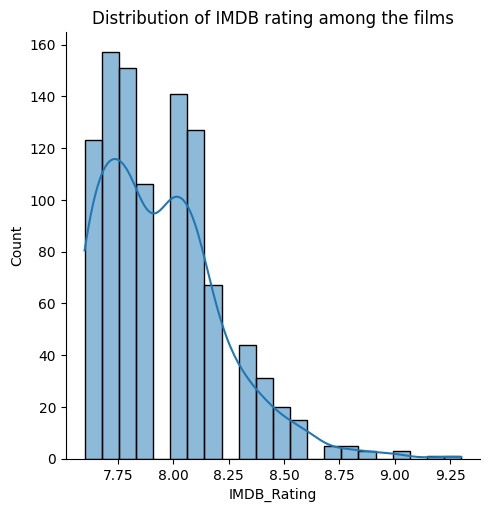

In [259]:
sns.displot(df, x='IMDB_Rating', kde=True).set(title='Distribution of IMDB rating among the films')

What is the distribution of runtime among the films?
---

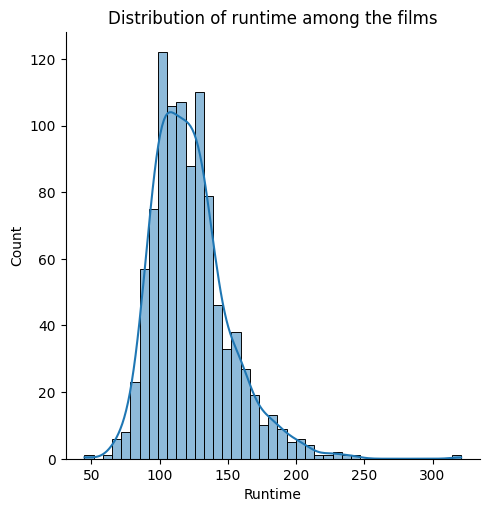

In [258]:
sns.displot(df, x='Runtime', kde=True).set(title="Distribution of runtime among the films")